## <font color='yellow'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='yellow'>Análise de Séries Temporais em Python</font>

Problema de Negócio:

### Usando dados históricos das vendas ao longo do tempo, seria possível prever o total de vendas em Janeiro do ano seguinte?

### <font color=orange>Verificar a Versão da Linguagem Python</font>

Esse código Python exibe a versão da linguagem Python que está sendo usada no ambiente do Jupyter Notebook. Ele importa a função `python_version` do módulo `platform` e, em seguida, imprime a versão do Python. Isso é útil para verificar a versão da linguagem e garantir que seu código seja compatível com essa versão específica.

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


### <font color=orange>Efetuar a Importação das Bibliotecas Importantes</font>

Esse código Python importa bibliotecas essenciais para análise de dados e previsões de séries temporais. Ele utiliza o NumPy para operações matriciais, o Pandas para manipulação de dados em formato tabular, o Matplotlib e o Seaborn para visualização gráfica, e a função SimpleExpSmoothing do statsmodels.tsa.holtwinters para realizar alisamento exponencial simples em séries temporais, uma técnica de previsão. Essas bibliotecas são fundamentais para análise e modelagem de dados temporais, possibilitando a criação de gráficos e a aplicação de técnicas estatísticas de previsão.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### <font color=orange>Efetuar o carregamento do conjunto de dados e exibir as 10 primeiras linhas da base de dados</font>

Nesse código Python, começamos carregando um conjunto de dados a partir de um arquivo CSV usando a biblioteca pandas e o armazenamos no DataFrame 'df'. Em seguida, usamos o método 'head(10)' para exibir as 10 primeiras linhas desse conjunto de dados, o que permite uma visualização rápida dos dados iniciais para entender sua estrutura e conteúdo.

In [3]:
df = pd.read_csv('datasetST.csv')
df.head(10)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
5,2023-01-06,39.330036
6,2023-01-07,50.377749
7,2023-01-08,54.187174
8,2023-01-09,55.870943
9,2023-01-10,62.912079


### <font color=orange>Exibir as 10 últimas linhas da base de dados ou DataFrame</font>

In [6]:
df.tail(10)

,Data,Total_Vendas
355,2023-12-22,52.988074
356,2023-12-23,59.889119
357,2023-12-24,66.406707
358,2023-12-25,77.331908
359,2023-12-26,73.563124
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


### <font color=orange>Verificar o número de linhas e colunas do DataFrame<font/>

Esse código em Python simplesmente verifica a forma de um DataFrame, ou seja, ele retorna uma tupla contendo o número de linhas e colunas no DataFrame. Isso é útil para ter uma visão rápida da estrutura dos dados que você está manipulando, permitindo verificar a dimensão do DataFrame. Por exemplo, se a saída for (365, 2), isso significa que o DataFrame tem 365 linhas e 2 colunas. É uma operação básica de inspeção de dados em análise de dados e manipulação de DataFrames com bibliotecas como o pandas.

In [4]:
df.shape

(365, 2)

### <font color=orange>Realizar a consulta das colunas do DataFrame<font/>

Esse código Python realiza uma simples operação de consulta nas colunas de um DataFrame, que é uma estrutura de dados tabular amplamente usada em análise de dados. Ele exibe o resultado, mostrando as colunas presentes no DataFrame, o que é útil para identificar quais variáveis estão disponíveis para análise e manipulação nos dados contidos no DataFrame.

In [5]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

## <font color=yellow>Pré-Processamento dos Dados Carregados</font>

### <font color=orange>Encontrar a data mínima na coluna 'Data'</font>

No código Python fornecido, está sendo realizado o seguinte: O comando 'df['Data'].min()' é utilizado para encontrar a data mínima na coluna 'Data' de um DataFrame, onde 'df' provavelmente representa o DataFrame que contém os dados. Esse código extrai a data mais antiga presente nessa coluna, útil para identificar o início dos dados temporais ou para realizar análises baseadas em datas.

In [9]:
df['Data'].min()

'2023-01-01'

### <font color=orange>Encontrar a data máxima na coluna 'Data'</font>

No código fornecido, estamos utilizando a biblioteca pandas para trabalhar com um DataFrame chamado 'df'. A linha de código em questão realiza a ação de encontrar a data máxima na coluna 'Data' desse DataFrame. Essencialmente, isso retorna a data mais recente presente nessa coluna, fornecendo uma visão rápida da última data registrada no conjunto de dados.

In [11]:
df['Data'].max()

'2023-12-31'

### <font color=orange>Exibir das informações do DataFrame</font>

O código em Python "df.info()" é usado para exibir informações detalhadas sobre um DataFrame, que é uma estrutura de dados do pandas. Ele fornece informações como o `número de linhas e colunas, a quantidade de memória usada, os tipos de dados das colunas e a contagem de valores não nulos em cada coluna`. Isso é útil para entender a composição e a qualidade dos dados contidos no DataFrame, o que facilita a análise e o processamento posterior dos dados.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


### <font color=orange>Converter a coluna de data para o tipo datetime</font>

No código Python fornecido, estamos convertendo a coluna 'Data' de um DataFrame, representando datas, para o tipo de dados datetime. Essa ação permite que as datas sejam interpretadas corretamente pelo Python, facilitando operações de data, análises temporais e visualizações em gráficos. É uma etapa fundamental ao lidar com conjuntos de dados que envolvem datas para garantir a precisão e a funcionalidade nas análises posteriores.

In [14]:
df['Data'] = pd.to_datetime(df['Data'])
df.head(10)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
5,2023-01-06,39.330036
6,2023-01-07,50.377749
7,2023-01-08,54.187174
8,2023-01-09,55.870943
9,2023-01-10,62.912079


### <font color=orange>Exibir das informações do DataFrame depois do tipo da data ser convertido</font>

Neste trecho de código Python, a função `info()` é utilizada para exibir informações sobre o DataFrame `df`. Após a conversão do tipo de data, essa função fornece detalhes cruciais sobre o DataFrame, incluindo o número de entradas, o tipo de dados de cada coluna, a quantidade de memória usada e outras informações essenciais para a análise de dados, auxiliando na compreensão da estrutura e conteúdo dos dados após a conversão da data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


### <font color=orange>Transformar o DataFrame em uma série temporal com a data como índice e exibir as 10 primeiras linhas do resultado</font>

Esse trecho de código em Python realiza a transformação de um DataFrame em uma série temporal, definindo a coluna 'Data' como o índice e 'Total_Vendas' como os valores da série. Com o método `set_index`, a coluna 'Data' é especificada como o novo índice, convertendo o DataFrame em uma estrutura de séries temporais. A função `head(10)` é usada para exibir as primeiras 10 linhas dessa série, mostrando uma prévia dos valores temporais dos 'Total_Vendas' relacionados a cada data, facilitando a visualização e análise dos dados.

In [20]:
time_series = df.set_index('Data')['Total_Vendas']
time_series.head(10)

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
2023-01-06    39.330036
2023-01-07    50.377749
2023-01-08    54.187174
2023-01-09    55.870943
2023-01-10    62.912079
Name: Total_Vendas, dtype: float64

### <font color=orange>Verificar o tipo da série temporal</font>

No código apresentado, estamos verificando o tipo da série temporal, que deve ser atribuída previamente à variável "time_series". Isso é útil para garantir que estamos lidando com uma série temporal no formato correto, pois algumas operações de análise de séries temporais requerem que a variável seja do tipo apropriado, como um objeto de data e hora ou um DataFrame. É uma verificação simples, mas fundamental para garantir que a análise subsequente seja realizada corretamente.

In [22]:

type(time_series)

pandas.core.series.Series

### <font color=orange>Definir a frequência da série temporal como diária e exibir uma amostra o resultado</font>

No código Python fornecido, estamos ajustando a frequência de uma série temporal para ser diária usando o método `.asfreq('D')`. Em seguida, usamos `.head(10)` para exibir as primeiras 10 entradas da série temporal. Isso é útil para garantir que os dados estejam na resolução diária e visualizar as primeiras observações da série.

In [24]:
time_series = time_series.asfreq('D')
time_series.head(10)

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
2023-01-06    39.330036
2023-01-07    50.377749
2023-01-08    54.187174
2023-01-09    55.870943
2023-01-10    62.912079
Freq: D, Name: Total_Vendas, dtype: float64

### <font color=orange>Criar o gráfico da série temporal sem formatação</font>

Nesse código Python, estamos criando um gráfico de uma série temporal de vendas. Primeiro, definimos o tamanho da figura e, em seguida, plotamos os dados da série temporal. Estabelecemos os rótulos dos eixos X e Y para representar a data e as vendas, respectivamente. O título do gráfico é definido como 'Série Temporal de Vendas', e ativamos a grade para melhorar a visualização. Por fim, exibimos o gráfico, permitindo a análise visual das vendas ao longo do tempo.

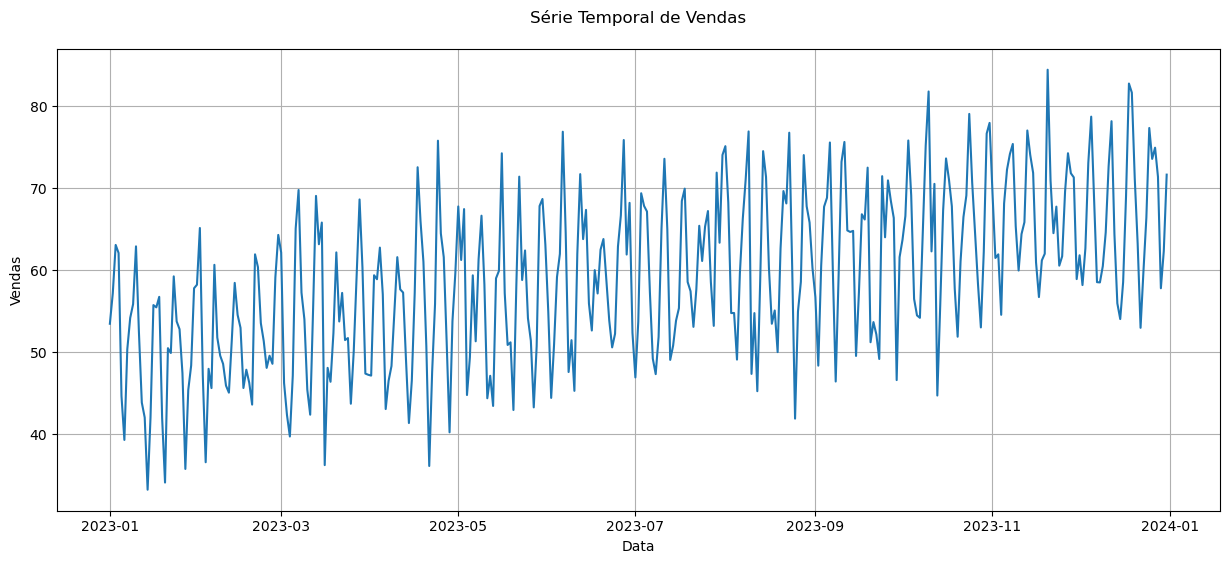

In [34]:
# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (15, 6))
plt.plot(time_series)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas\n')

# Configurar o estilo do gráfico
plt.grid(True)

plt.show()

### <font color=orange>Criar o gráfico da série temporal com formatação</font>

Neste código Python, estamos criando um gráfico de uma série temporal de vendas. Primeiro, definimos o tamanho e a cor do gráfico. Em seguida, configuramos as cores e o estilo do gráfico, definindo a cor de fundo como azul escuro e adicionando uma grade amarela pontilhada. Os rótulos dos eixos, título e legenda são personalizados com fontes e cores específicas. Por fim, configuramos as cores dos marcadores nos eixos X e Y, resultando em um gráfico de série temporal de vendas com um layout de contraste e detalhes visuais bem definidos.

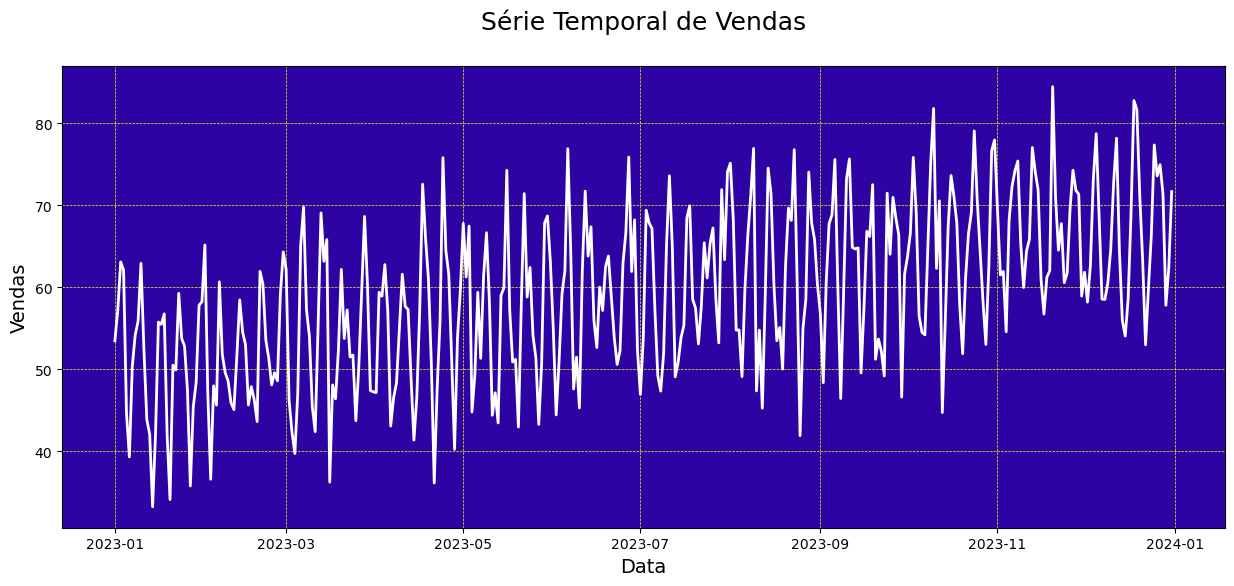

In [33]:
# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (15, 6))
plt.plot(time_series, color = 'white', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas\n', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

# <font color=yellow>Suavização Exponencial</font>

A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

### <font color=orange>Suposições da Suavização Exponencial</font>

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

No `Statsmodels`, a classe `SimpleExpSmoothing` é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo SimpleExpSmoothing do Statsmodels, também conhecido como suavização exponencial simples ou média móvel exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. As principais suposições do modelo SimpleExpSmoothing são as seguintes:

- A série temporal é composta por um componente de nível (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazonalidade na série.


- O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.


- O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos.


- O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.

O `modelo SimpleExpSmoothing` é uma técnica de suavização bastante simples que tem suas limitações. Ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades claras e para fazer previsões de curto prazo. Para séries temporais com componentes de tendência e/ou sazonalidade, modelos mais avançados como o ExponentialSmoothing de Holt-Winters ou modelos SARIMA podem ser mais apropriados.

### <font color=orange>Criar o modelo da Série Temporal</font>

No código Python fornecido, um modelo de alisamento exponencial simples (`SimpleExpSmoothing`) da biblioteca statsmodels é criado com base em uma série temporal (time_series). Esse modelo é uma técnica de previsão que suaviza os dados temporais, atribuindo maior peso às observações recentes. O modelo é configurado para ser usado posteriormente na previsão de valores futuros com base nos dados da série temporal fornecida. Com isso, cria uma instância da classe SimpleExpSmoothing, utilizando a coluna 'Vendas' da série `time_series` como entrada. 

In [41]:
model = SimpleExpSmoothing(time_series)

### <font color=orange>Ajustar o Modelo de Treinamento</font>

Nesse código Python, estamos ajustando um modelo usando o método de suavização exponencial simples (`SimpleExpSmoothing`) de séries temporais, definindo o parâmetro de suavização (`smoothing_level`) como 0.2. Isso implica que o modelo dará mais peso às observações mais recentes, com uma taxa de suavização de 20%, tornando-o sensível às mudanças recentes nos dados de treinamento. Essa técnica é frequentemente usada para prever valores futuros com base em padrões passados de séries temporais.

In [42]:
adjusted_model = model.fit(smoothing_level=0.2)

### <font color=orange>Obter os valores previstos pelo modelo de suavização exponencial

O código Python apresentado realiza a obtenção dos valores previstos por meio do modelo de suavização exponencial. A variável "`exponential_smoothing`" armazena essas previsões, que são geradas a partir de um modelo ajustado anteriormente. Esse processo é útil em análises de séries temporais, onde se busca suavizar os dados originais para prever tendências futuras com base em valores passados.

In [44]:
exponential_smoothing = adjusted_model.fittedvalues

**Análise**: Esta linha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão.

O resultado final é uma nova série temporal chamada `suavizacao_exponencial`, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo.

### <font color=orange>Criar o gráfico da série temporal usando o Modelo de Suavização Exponencial</font>

Nesse código Python, estamos criando um gráfico que exibe a comparação entre os valores reais (representados pela linha contínua) e as previsões geradas pelo modelo de suavização exponencial (representados pela linha tracejada). O gráfico é configurado com um tamanho de 15x6, e os eixos x e y são rotulados para representar a data e as vendas, respectivamente. Além disso, o gráfico recebe um título, "Modelo de Suavização Exponencial," e uma legenda que distingue as séries de dados. Ao final, o gráfico é exibido, permitindo a visualização das previsões em relação aos valores reais de vendas ao longo do tempo.

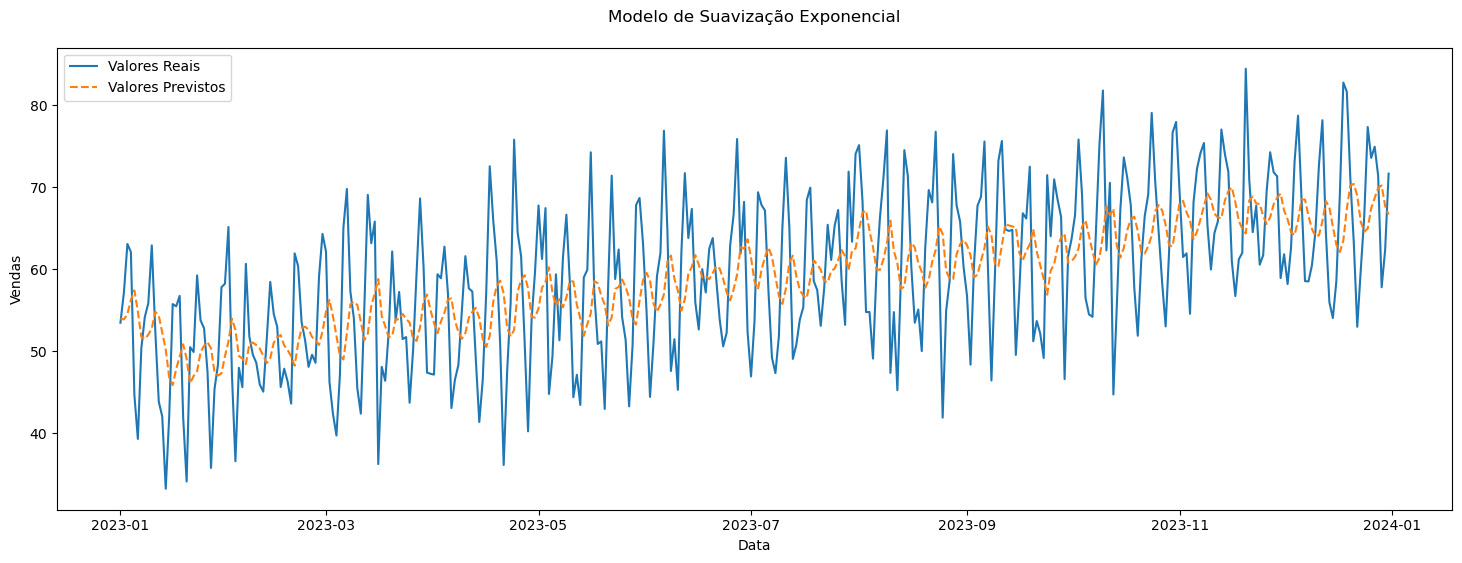

In [48]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(18, 6))

# Linha dos valores reais e das previsões da suavização exponencial
plt.plot(time_series, label='Valores Reais')
plt.plot(exponential_smoothing, label='Valores Previstos', linestyle='--')

# Definições do eixo x e y, título e legenda
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial\n')
plt.legend()

# Mostrando o gráfico
plt.show()

## <font color=yellow>Deploy e Previsão com o Modelo Treinado</font>

### <font color=orange>Realizar previsões</font>

Nesse código Python, estamos realizando previsões usando um modelo previamente ajustado. Definimos o número de previsões desejadas como 1 (num_forecasts), e em seguida, usamos o método "forecast" do modelo (adjusted_model) para calcular essas previsões. Por fim, imprimimos os resultados (forecasts). Essas previsões podem ser usadas para estimar valores futuros com base nas características do modelo previamente configurado.

In [59]:
num_forecasts = 1
forecasts = adjusted_model.forecast(steps=num_forecasts)
print('Previsão do Total de Vendas Para Janeiro/2024:', round(forecasts[0], 4))

Previsão do Total de Vendas Para Janeiro/2024: 67.6499
